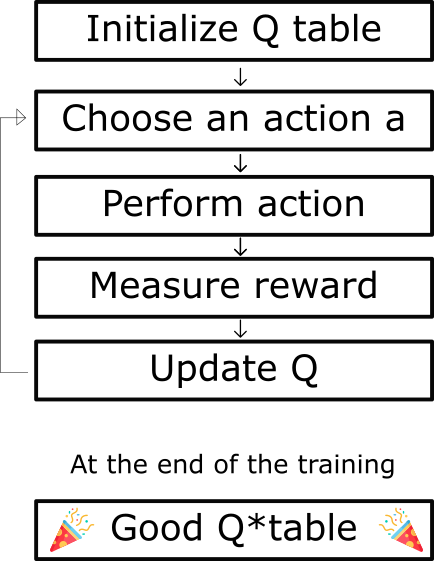

In [91]:
#import Libraries
import gym
import numpy as np

In [108]:
#environment Setup
env = gym.make('Taxi-v2')
env.reset()
env.render()

+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+



The Taxi Problem
    from "Hierarchical Reinforcement Learning with the MAXQ Value Function Decomposition"
    by Tom Dietterich
    Description:
    There are four designated locations in the grid world indicated by R(ed), B(lue), G(reen), and Y(ellow). When the episode starts, the taxi starts off at a random square and the passenger is at a random location. The taxi drive to the passenger's location, pick up the passenger, drive to the passenger's destination (another one of the four specified locations), and then drop off the passenger. Once the passenger is dropped off, the episode ends.
    Observations: 
    There are 500 discrete actions since there are 25 taxi positions, 5 possible locations of the passenger (including the case when the passenger is the taxi), and 4 destination locations. 
    
    Actions: 
    There are 6 discrete deterministic actions:
    - 0: move south
    - 1: move north
    - 2: move east 
    - 3: move west 
    - 4: pickup passenger
    - 5: dropoff passenger
    
    Rewards: 
    There is a reward of -1 for each action and an additional reward of +20 for delievering the passenger. There is a reward of -10 for executing actions "pickup" and "dropoff" illegally.
    

In [93]:
# random Moments

#Initializing counter and reward
counter = 0
reward = None

state=env.reset()
#Random Moments
while reward !=20:
    state, reward, done, info = env.step(env.action_space.sample())
    counter +=1
print(counter)

2456


In [96]:
 #begin Q (reinforcement learning)
#creating a matrix of 'number of possible states' to 'number of possible action' demensions.
#we need to maintain a Q value(V(s) in bellman's equation) for each state and for each  action allower in that state.
#as stated while explaining bellman's equation, initially Agent has no idea about any of Q value
#so we initialize it with allzeros
Q = np.zeros([env.observation_space.n,env.action_space.n])
# Initial reward variable G(as variable 'reward'
G=0
# Using a gamma value of 0.618. this is purely out of experiments, you can try another values
gamma = 0.618


array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])

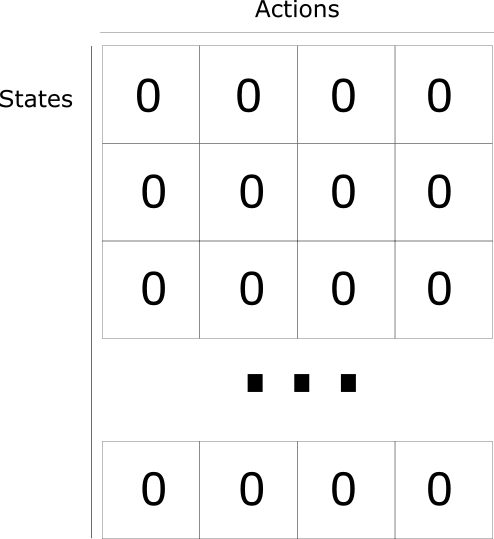

In [98]:
for episode in range(1,1001):
    #initially 'done' value, using to get out of while loop after completing task
    done = False
     # Respectiva value initialization for each iteration
    G, reward, counter = 0,0,0
        #resetting the environment and getting its state
    state = env.reset()
        
    while done != True:
        # while creating Q matrix, remember we had created with dimension rows = 'number of possible states' and columns = 'number of possible actions'
        #np.argmax(Q[state]) picks out the maximum value from row 'state in Q maxtrix.
        # In other words, it takes the current state, looks in the Q matrix, finds particular row for that
        # state and returns the indices (which will be the 'action' number) of the maximun values along that row
        action = np.argmax(Q[state])
        #use above obtain 'action' to perform a step and store its result
        state2, reward, done, info = env.step(action)
        #update our Q table based on Bellman's quation and result ontained from previous step. 
        Q[state,action] = (reward+ gamma*np.max(Q[state2]))
        G +=reward
        counter +=1
        state =state2
            
        #print iteration, reward and counter value for every 50th iteration.
    if episode %50 ==0:
        print('Episode {} Total Reward: {} counter:{}'. format(episode, G, counter))

Episode 50 Total Reward: -85 counter:106
Episode 100 Total Reward: -5 counter:26
Episode 150 Total Reward: -16 counter:37
Episode 200 Total Reward: 9 counter:12
Episode 250 Total Reward: 4 counter:17
Episode 300 Total Reward: 7 counter:14
Episode 350 Total Reward: 10 counter:11
Episode 400 Total Reward: 11 counter:10
Episode 450 Total Reward: 11 counter:10
Episode 500 Total Reward: 7 counter:14
Episode 550 Total Reward: 6 counter:15
Episode 600 Total Reward: 12 counter:9
Episode 650 Total Reward: 8 counter:13
Episode 700 Total Reward: 4 counter:17
Episode 750 Total Reward: 9 counter:12
Episode 800 Total Reward: 5 counter:16
Episode 850 Total Reward: 8 counter:13
Episode 900 Total Reward: 13 counter:8
Episode 950 Total Reward: 9 counter:12
Episode 1000 Total Reward: 13 counter:8


In [105]:
env.reset()
rewards = []
max_step = 9
for episode in range(100):
        state = env.reset()
        step = 0
        done = False
        total_rewards = 0
        
        for step in range(max_step):
            env.render()
            #take an action (index that have the maxium expected future reward
            action = np.argmax(Q[state,:])
            new_state, reward, done, info = env.step(action)
            total_rewards += reward
            print(reward,' ', action,' ', step)
            if done:
                rewards.append(total_rewards)
                #print('Score', total_rewards)
                break
            state = new_state
env.close()
print('Score over time:', str(sum(rewards)/100))

+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+

-1   4   0
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Pickup)
-1   0   1
+---------+
|R: | : :G|
|_: : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
-1   2   2
+---------+
|R: | : :G|
| :_: : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (East)
-1   2   3
+---------+
|R: | : :G|
| : :_: : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (East)
-1   1   4
+---------+
|R: |_: :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)
-1   2   5
+---------+
|R: | :_:G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (East)
-1   2   6
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (East)
20   5   7
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+

-1   3   0
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---

-1   1   7
+---------+
|R: | : :G|
| : : : : |
| : : :_: |
| | : | : |
|Y| : |B: |
+---------+
  (North)
-1   1   8
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+

-1   0   0
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
-1   0   1
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
-1   0   2
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
-1   4   3
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Pickup)
-1   1   4
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : |_: |
|Y| : |B: |
+---------+
  (North)
-1   1   5
+---------+
|R: | : :G|
| : : : : |
| : : :_: |
| | : | : |
|Y| : |B: |
+---------+
  (North)
-1   3   6
+---------+
|R: | : :G|
| : : : : |
| : :_: : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
-1   3   7
+---------+
|R: | : :G|
| : : : : |
| :_: : : |
| | :

  (East)
-1   0   2
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
-1   0   3
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
-1   0   4
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
-1   4   5
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Pickup)
-1   2   6
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B:_|
+---------+
  (East)
-1   1   7
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | :_|
|Y| : |B: |
+---------+
  (North)
-1   1   8
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+

-1   1   0
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)
-1   1   1
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)
-1   4   2
+---------+
|R: | : :G|
| : : : : |
| : : : 

+---------+
|R: | : :G|
| : : :_: |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
-1   3   6
+---------+
|R: | : :G|
| : :_: : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
-1   3   7
+---------+
|R: | : :G|
| :_: : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
-1   3   8
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+

-1   4   0
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Pickup)
-1   0   1
+---------+
|R: | : :G|
|_: : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
-1   2   2
+---------+
|R: | : :G|
| :_: : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (East)
-1   2   3
+---------+
|R: | : :G|
| : :_: : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (East)
-1   2   4
+---------+
|R: | : :G|
| : : :_: |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (East)
-1   0   5
+---------+
|R: | : :G|
| : : : : |
| : : :_: |
| | : | : |
|Y| : |B:

another Update the Q-function

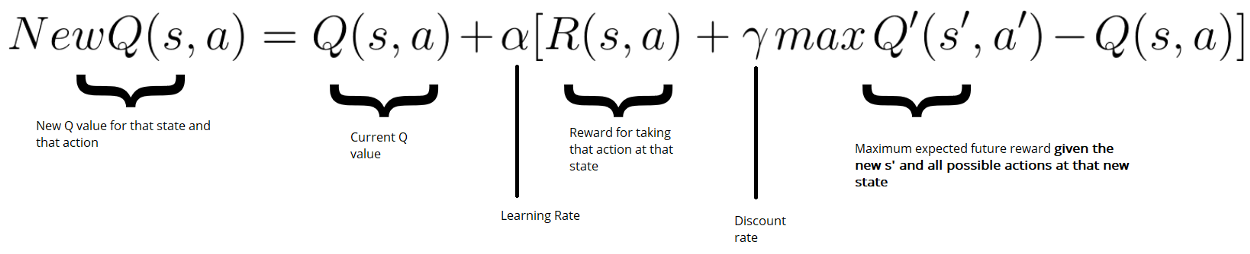

https://medium.freecodecamp.org/diving-deeper-into-reinforcement-learning-with-q-learning-c18d0db58efe
https://github.com/simoninithomas/Deep_reinforcement_learning_Course/blob/master/Q%20learning/Taxi-v2/Q%20Learning%20with%20OpenAI%20Taxi-v2%20video%20version.ipynb